# Deep Learning - Final Project
## BSE - Data Science Methodology
### Students: Alessandro Ciancetta and Alessandro Tenderini

In [1]:
## Load modules
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]

## Load code from D2FM.py
from D2FM import ForecastEvaluation, GridSearch

# Data loading and scaling

In [2]:
## Load data 
d = pd.read_csv("Data/finalStockData.csv")
stock_names = d.columns[1:]
d = d.iloc[:,1:].to_numpy() 

## Scale data
scaler = StandardScaler()
scaler.fit(d)
d = scaler.transform(d)

# Grid search

The grid search and the final evaluation jointly took about 16 hours to run on a separate script. In this notebook, we interrupted the execution in the first point and loaded the results of the calibration from the previous execution.

In [3]:
## Model calibration: grid search
d2fm_calibration = GridSearch(d)
d2fm_calibration.grid_search(
    latent_size_values = [8, 24, 50],
    hidden_layer_values = np.array([[500, 200, 100, 50], [1200, 600, 300, 150, 75], [500, 200, 150, 100, 80, 60, 60]], dtype=object),
    seq_length_values = np.array([7, 14]),
    hidden_size_gru_values = [128, 60],
    decoder_type_values=["linear", "symmetric"],
    num_layers_gru_values = [1,2,4], 
    schedule_values = [0.99],
    lr_values = [0.01],
    test_size_fixed=40,
    epochs_fixed=50)


--------------
Point of the grid 1 of 216
--------------
===== PREDICTION 1 of 40 =====
----- Start fitting autoencoder -----
Epoch 10 - Loss: 1.5490
Epoch 20 - Loss: 1.0689
Epoch 30 - Loss: 0.8531
Epoch 40 - Loss: 0.7488
Epoch 50 - Loss: 0.6887
----- Start fitting GRU -----
Epoch 10 - Loss: 0.6575
Epoch 20 - Loss: 0.0239
Epoch 30 - Loss: 0.0143
Epoch 40 - Loss: 0.0128
Epoch 50 - Loss: 0.0128
===== PREDICTION 2 of 40 =====
----- Start fitting autoencoder -----
Epoch 10 - Loss: 0.6328
Epoch 20 - Loss: 0.5831


KeyboardInterrupt: 

In [3]:
## Save results
file_name_calibration = 'Results/d2fm_calibration.pkl'
# file_name_calibration = 'Results/d2fm_calibration.pkl'
# with open(file_name_calibration, 'wb') as file:
#     pickle.dump(d2fm_calibration, file)
#     print(f'Object successfully saved to "{file_name_calibration}"')

## Reload results
with open(file_name_calibration, 'rb') as file:
    d2fm_calibration = pickle.load(file)
    print(f'Object loaded from "{file_name_calibration}"')

Object loaded from "Results/d2fm_calibration.pkl"


In [4]:
# Best model found:
d2fm_calibration.get_best_param()

{'latent_size': 50,
 'hidden_layer_sizes': [500, 200, 100, 50],
 'decoder_type': 'symmetric',
 'seq_length': 7,
 'hidden_size_gru': 128,
 'num_layers_gru': 2,
 'schedule': 0.99,
 'lr': 0.01,
 'test_size': 500,
 'batch_size': 500,
 'epochs': 100,
 'autosave': True,
 'device': device(type='cuda')}

# Forecast evaluation

In [5]:
## Set parameters for forecast evaluation, using the hyperparameters found in grid search
hyper_param = d2fm_calibration.get_best_param()
hyper_param["test_size"] = 500
hyper_param["epochs"] = 100
hyper_param["autosave"] = True

In [31]:
## Fit the model with tuned hyper-parameters
d2fm_evaluation = ForecastEvaluation(d, hyper_param)
d2fm_evaluation.evaluate()

Parameters of the autoencoder successfully loaded from learned_parameters/AE_input978_symmetric500_200_100_50.pt
Parameters of the GRU successfully loaded from learned_parameters/GRU_input50_hidden128_layers2.pt
===== PREDICTION 1 of 500 =====
----- Start fitting autoencoder -----
Epoch 10 - Loss: 0.0025
Epoch 20 - Loss: 0.0030
Epoch 30 - Loss: 0.0023
Epoch 40 - Loss: 0.0024
Epoch 50 - Loss: 0.0023
Epoch 60 - Loss: 0.0022
Epoch 70 - Loss: 0.0022
Epoch 80 - Loss: 0.0022
Epoch 90 - Loss: 0.0022
Epoch 100 - Loss: 0.0021
----- Start fitting GRU -----
Epoch 10 - Loss: 0.4001
Epoch 20 - Loss: 0.2633
Epoch 30 - Loss: 0.2113
Epoch 40 - Loss: 0.1821
Epoch 50 - Loss: 0.1626
Epoch 60 - Loss: 0.1504
Epoch 70 - Loss: 0.1374
Epoch 80 - Loss: 0.1294
Epoch 90 - Loss: 0.1241
Epoch 100 - Loss: 0.1199
===== PREDICTION 2 of 500 =====
----- Start fitting autoencoder -----
Epoch 10 - Loss: 0.0025
Epoch 20 - Loss: 0.0027


KeyboardInterrupt: 

In [6]:
file_name_evaluation = 'Results/d2fm_evaluation.pkl'
## Save the results
# with open(file_name_evaluation, 'wb') as file:
#     pickle.dump(d2fm_evaluation, file)
#     print(f'Object successfully saved to "{file_name_evaluation}"')

## Reload the results
with open(file_name_evaluation, 'rb') as file:
    d2fm_evaluation = pickle.load(file)
    print(f'Object loaded from "{file_name_evaluation}"')

Object loaded from "Results/d2fm_evaluation.pkl"


# Results

Stock: GOOGL.Adjusted


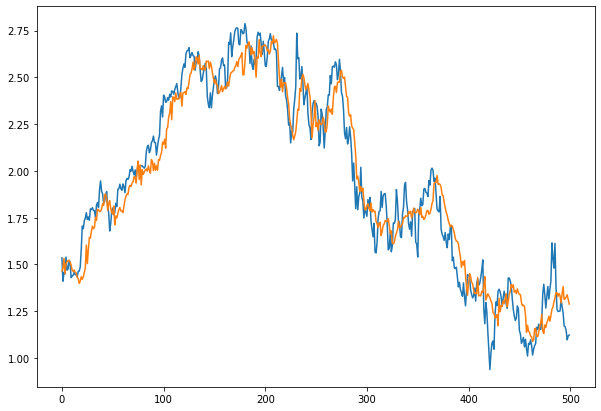

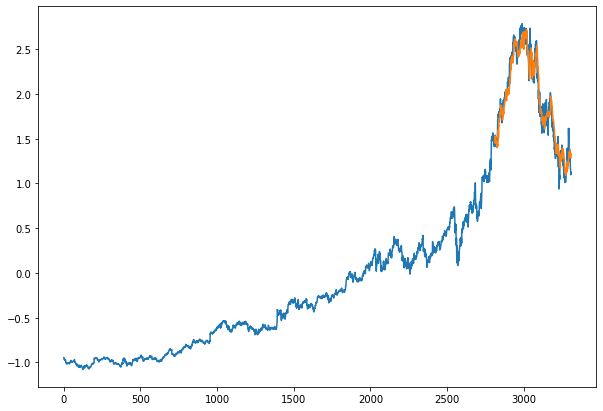

Stock: MSFT.Adjusted


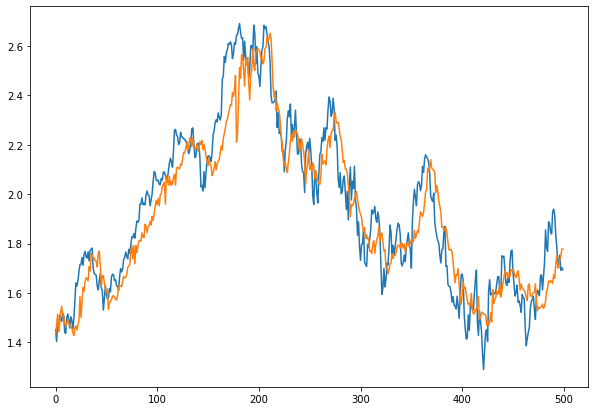

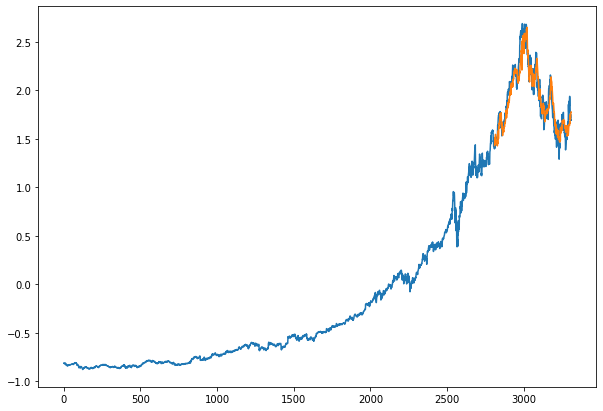

In [7]:
## Google
print("Stock:", stock_names[450])
d2fm_evaluation.plot_predictions(series_index=450)

## Microsoft
print("Stock:", stock_names[699])
d2fm_evaluation.plot_predictions(series_index=699)